# MMA 869: Individual Assignment

<font color='red'>\# TODO: fill in the below</font>

- [Adaure, Ibe]
- [20254264]
- [Section 2]
- [The Road Less Traveled]
- [1-8-2021]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python. You may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and scipy`.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [ ]:
import datetime
import pandas as pd
import numpy as np

In [ ]:
print(datetime.datetime.now())

2021-08-15 22:31:44.071052


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.7.11


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
# TODO: install any packages you need to here. For example
!pip install category_encoders

In [ ]:
#Importing packages to be used in project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import category_encoders as ce
import pandas as pd
import numpy as np

#Importing clustering packages
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every single posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a winner and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descripive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.


## 1.0: Load data 

In [ ]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm") #This DF will be standarzided  
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [ ]:
df2 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm") #This DF will be normalized

In [ ]:
df5 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm") #This DF will be used in the interpretation of clusters 

In [ ]:
#Data Exploration
list(df1)
df1.shape
df1.info()
df1.describe().transpose()
df1.head(n=20)
df1.tail()

['Age', 'Income', 'SpendingScore', 'Savings']

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


,Age,Income,SpendingScore,Savings
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


In [ ]:
#scaling the data
scaler = StandardScaler()
features = ['Age', 'SpendingScore','Income','Savings']
df1[features] = scaler.fit_transform(df1[features])

In [ ]:
#Reviewing standardized data
df1.shape
df1.info()
df1.describe().transpose()
df1.head(10)
df1.tail()

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    float64
 1   Income         505 non-null    float64
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,5.672031e-17,1.000992,-1.742394,-1.037472,-0.000821,1.077295,1.574888
Income,505.0,-2.638154e-17,1.000992,-1.766355,-1.139805,-0.012106,0.878451,1.849048
SpendingScore,505.0,-1.954432e-16,1.000992,-1.947295,-0.772201,-0.527678,1.014725,1.908103
Savings,505.0,-4.058360e-16,1.000992,-2.399206,-1.018085,0.474782,0.846387,1.645835


,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686
5,-1.244802,1.559204,1.318359,-1.684141
6,-0.208151,0.027441,1.079955,-1.007937
7,1.160228,-0.915567,-0.577512,1.258782
8,0.994363,-1.143838,-0.695375,0.590763
9,1.035829,-1.329920,-0.532121,1.216971


,Age,Income,SpendingScore,Savings
500,-1.286268,0.714535,-0.453557,0.621787
501,1.409024,-1.545704,-1.164109,1.235201
502,1.284626,-1.118447,-0.578054,0.855313
503,1.326092,-1.524929,-0.579866,1.322452
504,1.243160,-1.258335,-0.831890,0.510463


## 1.1: Clustering Algorithm #1

##### K Means Cluster 1, K = 3

In [ ]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
k_means.labels_

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2,
       1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 1,
       2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 1,
       0, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2,
       0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0,
       1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1,

In [ ]:
#Reviewing the centre of the cluster
k_means.cluster_centers_

array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-0.31952856,  0.28812391,  1.14397016, -1.14260341],
       [-0.72276928,  0.89502598, -0.90658925,  0.62188649]])

In [ ]:
silhouette_score(df1, k_means.labels_) #assesing K means model 1

0.6963481945884472

###### K Means Cluster 2, K = 5

In [ ]:
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
#Reviewing the centre of the cluster
k_means.cluster_centers_

array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

In [ ]:
silhouette_score(df1, k_means.labels_) #assesing k means model 2

0.8048976287755765

###### K Means Cluster 3, K = 7

In [ ]:
k_means = KMeans(n_clusters=7, random_state=42)
k_means.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
#Reviewing the centre of the cluster
k_means.cluster_centers_

array([[-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.07457166, -0.04739431,  1.103503  , -1.17579009],
       [ 1.20769522, -1.32463708, -0.66366435,  1.15332719],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052],
       [ 0.01284901, -0.11269955,  0.97188625, -0.88232903],
       [ 1.1759963 , -1.3256078 , -0.6967374 ,  0.77410112]])

In [ ]:
silhouette_score(df1, k_means.labels_) #assesing k means model 3

0.44624135722251396

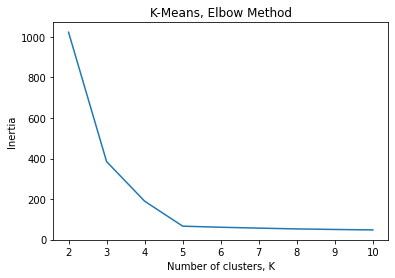

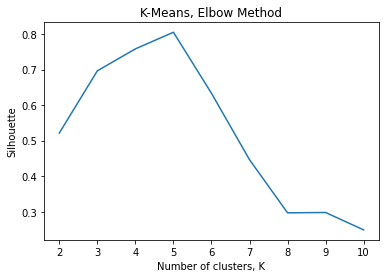

In [ ]:
#selecting the optimal hyperparameters
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df1)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(df1, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

##### The Ideal Number of clusters is **5** in both the inertia and silhouette plots


## 1.2: Clustering Algorithm #2

In [ ]:
#Normalizing the data
from sklearn import preprocessing
x = df2.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)


In [ ]:
df2.head(5) #review transfromed data

,0,1,2,3
0,0.5125,0.505915,0.791329,0.327991
1,0.5250,0.536915,0.791082,0.270883
2,0.5625,0.482700,0.702657,0.462950
3,0.5250,0.479792,0.765680,0.367317
4,0.8750,0.044308,0.348778,0.843475


In [ ]:
#DBSCAN Model 1
db = DBSCAN(eps=0.3, min_samples=3, leaf_size=30, metric='euclidean')
db.fit(df2)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [ ]:
db.labels_

array([0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 3, 4, 4, 4, 0, 3, 0, 1, 1, 3, 4, 3,
       0, 1, 3, 2, 2, 0, 1, 0, 0, 0, 1, 0, 4, 0, 1, 0, 4, 4, 0, 1, 2, 0,
       0, 2, 3, 2, 4, 0, 1, 4, 2, 1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 2, 2, 0, 0, 4, 1, 1, 4, 0, 4, 0, 0, 2, 0, 3, 0, 1, 1, 4, 4, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 4, 0, 0, 4, 4, 2, 4, 2, 4, 1, 1, 4, 4, 0,
       1, 4, 0, 4, 4, 4, 0, 4, 2, 1, 4, 1, 1, 1, 4, 3, 0, 1, 0, 0, 4, 0,
       4, 0, 2, 1, 3, 2, 0, 4, 1, 0, 0, 2, 0, 2, 0, 3, 0, 1, 0, 4, 1, 0,
       1, 3, 4, 0, 1, 0, 4, 1, 0, 4, 1, 4, 1, 0, 4, 0, 1, 0, 4, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 4, 2, 2, 1, 4, 0, 0, 0, 4, 1, 0, 0, 0, 1, 2, 4,
       1, 1, 1, 4, 0, 4, 0, 4, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 4, 2, 4, 1,
       0, 0, 4, 1, 4, 2, 4, 0, 0, 1, 0, 0, 1, 0, 0, 0, 4, 0, 4, 4, 2, 0,
       0, 0, 3, 0, 4, 1, 2, 2, 2, 1, 0, 4, 1, 1, 4, 4, 0, 0, 3, 0, 0, 1,
       0, 1, 4, 2, 0, 4, 1, 0, 1, 1, 4, 0, 1, 1, 0, 0, 1, 4, 4, 3, 4, 1,
       1, 4, 3, 1, 1, 2, 0, 4, 4, 0, 4, 1, 1, 4, 0,

In [ ]:
silhouette_score(df2, db.labels_) #assesing model results
db.fit(df2)

0.8156911152768872

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [ ]:
#DB Scan Model 2
db2 = DBSCAN(eps=0.5, min_samples=4)
db2.fit(df2)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [ ]:
silhouette_score(df2, db.labels_) #assesing Model Results
db2.fit(df2)

0.8156911152768872

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [ ]:
#DB San Model 3
db3 = DBSCAN(eps=0.1, min_samples=5)
db3.fit(df2)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
silhouette_score(df2, db.labels_) #assesing model results
db3.fit(df2)

0.8156911152768872

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

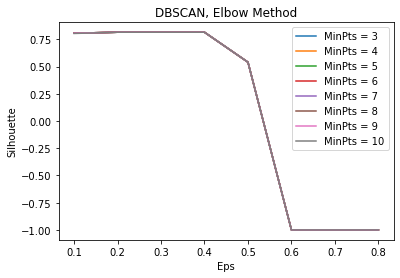

In [ ]:
#Assessing the optimum hyperparamaters 
silhouettes = {}

epss = np.arange(0.1, 0.9, 0.1)
minss = [3, 4, 5, 6, 7, 8, 9, 10]

ss = np.zeros((len(epss), len(minss)))

for i, eps in enumerate(epss):
    for j, mins in enumerate(minss):
        db = DBSCAN(eps=eps, min_samples=mins).fit(df2)
        if len(set(db.labels_)) == 1:
            ss[i, j] = -1
        else:
            ss[i, j] = silhouette_score(df2, db.labels_, metric='euclidean')
    

plt.figure();
#plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
for i in range(len(minss)):
    plt.plot(epss, ss[:, i], label="MinPts = {}".format(minss[i]));
#plt.plot(epss, ss[:, 1]);
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.legend();
#plt.savefig('out/simple_dbscan_elbow');


##### The optimal hyperparamter  an EPS of 0.1 to 0.4 and MinPts of 8

## 1.3 Model Comparison

The DBSCAN outperforms the RF at the optimal hyperparameters as it has a higher mean score of 0.8156 as opposed to RF which has a mean score of 0.8004. This means that the DBSCAN is able to create clusters which are more differentiated, making it the better option but not significantly as the mean score difference is about 0.0152. In terms of speed, both models had a similar processing time, and one did not outperform the other so there wasn't really a significant advantage of one over the other. For interpretability, I opted to use the RF model as I found it easier to create personas out of its clusters. It might not necessarily be the case for all users, so I would say the ease at which one can interpret the clusters is relative. 

## 1.4 Personas

####**Cluster 1**- Retired Low spenders

This cluster is made up of people in their 80's who are most likely dependent on their retirement package, hence the low income and high savings. They also tend to not spend a lot of money.

####**Cluster 2-** Moderate Middle Agers

This cluster is made up of people in their mid fifties to early sixties who are decent earners, have moderate to high income, moderate savings and moderate to high spending.

#### **Cluster 3** - Responsible 30's

This cluster is made up of people in their 30's who are very high earners, spend very little and save a lot.

#### **Cluster 4** - Make Money, Spend Money, Save Money

This cluster is made up of all ages, ranging from teenagers to people in their early nineties. It is the highest earning cluster of the bunch and has very little spending for those who are 30 and younger and very high spending for those abover 30 years old. The savings pattern in this cluster follows a similar pattern to spending. Those who are 30 and younger tend to save very little while those older than 30 tend to save quite a lot. I think this cluster can be broken down further into 30 and below and 30 and above as they have differentiated mutual traits.


In [ ]:
k_means = KMeans(n_clusters=5, random_state=42) #recreating model with the optimal number of clusters for interpretation
k_means.fit(df5)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    print(df5[k_means.labels_==label].head())


Cluster 0:
    Age  Income  SpendingScore       Savings
10   85  111389       0.036795  16009.237763
13   31  107963       0.290509  13407.081391
19   88  120678       0.063273  14264.473847
24   89  119697       0.091679  16215.399077
39   31  111449       0.294106  13929.621551

Cluster 1:
    Age  Income  SpendingScore       Savings
4    87   17760       0.348778  16869.507130
7    87   42592       0.355290  18086.287158
8    83   34384       0.324719  14783.379086
9    84   27693       0.367063  17879.558906
17   87   31481       0.317424  16180.688082

Cluster 2:
   Age  Income  SpendingScore      Savings
0   58   77769       0.791329  6559.829923
1   59   81799       0.791082  5417.661426
2   62   74751       0.702657  9258.992965
3   59   74373       0.765680  7346.334504
6   54   76500       0.785198  6878.884249

Cluster 3:
    Age  Income  SpendingScore       Savings
11   36   99780       0.265433  16398.401333
12   30   99949       0.344679  13621.639726
20   30  101073    

# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

{Cake} -> {Balloons}
 
 In most Ontario grocery stores it is quite common to see a cake purchased alongside other celebratory items such as balloons. Nonetheless,  cakes tend to be in the bakery section while balloons are at a different section of the store, right next to the flowers, celebratory cards etc. Since both goods are complimentary, it might be more beneficial to have them displayed within the same area or at least within a similar eye view range. That way, Uncle Steve can increase the chances of both complimentary goods being bought at the same time by customers who might have just intended to make a single purchase of both items. For instance, a customer might have come to the store to purchase a birthday cake and if they saw balloons right next to the cake, they may be incentivized to buy balloons as well to compliment the cake. Those items tend to go well together, especially for celebratory purposes. Ultimately, having complimentary products side by side can increase cross selling and overall product sales.

## 2.2: A rule that might have reasonably high support but low confidence.

{Canned Food} -> {Can Opener}

Canned food are staple household items, depending on what time of food you consume.  On average these items tend to be opened with can openers and as a result, it is not uncommon to see both items in the same basket. Nonetheless, canned foods do not necessarily increase the likelihood of buying a can opener with every purchase of canned foods. This is because can openers are items that people purchase sparingly. People tend to purchase can openers only when their current can opener is broken or worn out. This is a key insight for Uncle Steve in terms of product placement and display space usage. Given that can openers are not products that are purchased very often, I would recommend that Uncle Steve does not provide a lot of shelf space for it. I would recommend that he places these items close to the canned foods, in terms of the display but with less shelf space so that he can have space for other products that need it more. Uncle Steve can economize the shelf space by hanging the can openers across the canned foods shelf. This layout also makes it accessible for his customers to purchase the products that they need with ease.

## 2.3: A rule that might have low support and low confidence.

{Regular Coke} -> {Diet Coke}


People tend to be either diet coke or regular coke drinkers. It is odd to see and individual purchasing both items unless it’s for people other than themselves. But for this example, let’s assume that it’s based on a specific individuals purchase. A purchase of coke will unlikely increase the purchase of diet coke as individuals will have a strong preference between both items. This is important for Uncle Steve to know because its plausible for him to treat both items as substitutes. That is to say that he may think that if coke is out of stock, his customers might easily replace it with diet coke but that will most likely not be the case due to their strong preference per each item. The absence of coke will most likely result in an overall non purchase which will be lost sales for Uncle Steve had he had both items readily available. Therefore, Uncle Steve needs to treat both items as individuals and not substitutes and ensure that they are always stocked so his customers are able to purchase their preferred option which will translate to regular sales for him.



## 2.4: A rule that might have low support and high confidence.

{Vegetable Platter} -> {Red Solo Cup}

Right off the bat this seems like an odd combo, and it is not very common to see vegetables mixed with an item such as red solo cups. Veggie platters suggest relatively healthy eating, while red solo cups suggest college frat parties. Nonetheless, both items are products that one could easily spot at casual parties. Casual parties or get togethers tend to include plastic cups, plates etc. In my experience, there are almost always veggie options available for vegetarians and “healthy eaters” at these events, and veggie platters are they go-to due to the variety it offers. As a result, the purchase of a veggie platter can increase the likelihood of the purchase of a red solo cup. This is important for Uncle Steve to know in terms of product placement and cross-selling and up-selling. I would suggest that Uncle Steve places red solo cups relatively close to the veggie platter section, perhaps on a mini stand to encourage potential buyers who are purchasing veggie platters to pick up red solo cups as well. This will ultimately translate into more sales and better customer experience as their products of interest are within close range.

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [ ]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


In [ ]:
X.info() #Reviewing Data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  Amount             6000 non-null   int64 
 11  Married            6000 non-null   int64 
 12  Duration           6000 non-null   int64 
 13  City               6000 non-null   object
 14  Purpose            6000 non-null   object
 15  DateOfBirth        6000 non-null   object
dtypes: int64(7), object(9)
memory usage: 750.1

In [ ]:
X.head(5) #Reviewing features more closely

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
0,218-84-8180,F,0,Debra,Schaefer,2,3,1,503 Linda Locks,395C,3907,0,24,Port Keith,Vacation,1964-04-07
1,395-49-9764,M,0,Derek,Wright,0,1,1,969 Cox Dam Suite 101,UFZ 691,3235,0,12,Lake Debra,NewCar,1978-06-02
2,892-81-4890,F,0,Shannon,Smith,0,0,2,845 Kelly Estate,48A•281,3108,1,30,North Judithbury,NewCar,1972-03-18
3,081-11-7963,F,0,Christina,Brooks,2,1,3,809 Burns Creek,30Z J39,4014,1,36,Lake Chad,Other,1985-02-26
4,347-03-9639,M,0,Ralph,Anderson,1,5,1,248 Brandt Plains Apt. 465,71-Q331,3823,0,18,North Judithbury,Vacation,1983-08-08


In [ ]:
X.select_dtypes(["object"]).nunique() #exploring the categorical features with unique values

UserID          6000
Sex                2
FirstName        600
LastName         942
Street          6000
LicensePlate    5999
City              20
Purpose            8
DateOfBirth     4215
dtype: int64

## 3.1: Baseline model

In [ ]:
#Pipline 1
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

numeric_features = ['Amount', 'Duration', 'NumberPets', 
                    'ResidenceDuration', 'Married', 'PreviousAccounts','PreviousDefault']

categorical_features = ['City', 'Sex','Purpose']

drop_features = ['UserID', 'DateOfBirth', 'FirstName', "LastName", 
                 'Street', 'LicensePlate']

clf = DecisionTreeClassifier(random_state=42)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ])

categorical_transformer = Pipeline(steps=[
      ('encoder', OneHotEncoder(handle_unknown='ignore')),
      ])

preprocessor1 = Pipeline(steps=[
      ('ct', ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features),
            ('drop', 'drop', drop_features)],
            remainder = 'passthrough', 
            sparse_threshold=0)),
    ])

pipe1 = Pipeline(steps=[('preprocessor', preprocessor1),  ('clf', clf)])

scores1 = cross_val_score(pipe1, X_train, y_train, 
                          scoring='f1_macro', cv=10, n_jobs=-1)
print(scores1)
print(np.mean(scores1))

[0.60335261 0.62309891 0.5425     0.65969125 0.62710811 0.6373402
 0.56868105 0.62982277 0.61399851 0.59607293]
0.6101666347932755


## 3.2: Feature engineering

In [ ]:
#Pipleline 2
from sklearn.tree  import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import KernelPCA, PCA, TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

numeric_features = ['Amount', 'Duration', 'NumberPets', 
                    'ResidenceDuration', 'Married', 'PreviousAccounts','PreviousDefault']

categorical_features = ['City', 'Sex','Purpose']

drop_features = ['UserID', 'FirstName', "LastName", 
                 'Street', 'LicensePlate']

def get_age_years(feature):
  res = np.array([])
  for instance in feature:
    age = 2021 - int(instance[0:4])
    res = np.append(res, age)
  return res.reshape(-1, 1)

clf = DecisionTreeClassifier(random_state=42)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ])

categorical_transformer = Pipeline(steps=[
      ('encoder', OneHotEncoder(handle_unknown='ignore')),
      ])

preprocessor2 = Pipeline(steps=[
      ('ct', ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('amount_log', FunctionTransformer(np.log10, validate=False), ['Amount']),
            ('cat', categorical_transformer, categorical_features),
            ('age', FunctionTransformer(get_age_years, validate=False), 'DateOfBirth'),
            ('drop', 'drop', drop_features)],
            remainder = 'passthrough', 
            sparse_threshold=0)),
    ('pca', PCA(n_components=10)),
    ])

pipe2 = Pipeline(steps=[('preprocessor', preprocessor2),  ('clf', clf)])

scores2 = cross_val_score(pipe2, X_train, y_train, 
                          scoring='f1_macro', cv=10, n_jobs=-1)
print(scores2)
print(np.mean(scores2))

[0.75592531 0.76345083 0.71366221 0.715      0.73526167 0.69160235
 0.76013516 0.72624375 0.67917973 0.72345679]
0.7263917812460762


## 3.3: Feature selection

In [ ]:
#pipline 3
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import KernelPCA, PCA, TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

numeric_features = ['Amount', 'Duration', 'NumberPets', 
                    'ResidenceDuration', 'Married', 'PreviousAccounts','PreviousDefault']

categorical_features = ['City', 'Sex','Purpose']

drop_features = ['UserID', 'FirstName', "LastName", 
                 'Street', 'LicensePlate']

def get_age_years(feature):
  res = np.array([])
  for instance in feature:
    age = 2021 - int(instance[0:4])
    res = np.append(res, age)
  return res.reshape(-1, 1)

clf = DecisionTreeClassifier(random_state=42)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ])

categorical_transformer = Pipeline(steps=[
      ('encoder', OneHotEncoder(handle_unknown='ignore')),
      ])

preprocessor3 = Pipeline(steps=[
      ('ct', ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('amount_log', FunctionTransformer(np.log10, validate=False), ['Amount']),
            ('cat', categorical_transformer, categorical_features),
            ('age', FunctionTransformer(get_age_years, validate=False), 'DateOfBirth'),
            ('drop', 'drop', drop_features)],
            remainder = 'passthrough', 
            sparse_threshold=0)),
    ('pca', PCA(n_components=11)),
    ('feature_selector', SelectKBest(k=11))
    ])

pipe3 = Pipeline(steps=[('preprocessor', preprocessor3),  ('clf', clf)])

scores3 = cross_val_score(pipe3, X_train, y_train, 
                          scoring='f1_macro', cv=11, n_jobs=-1)
print(scores3)
print(np.mean(scores3))

[0.77267998 0.68704504 0.70162815 0.71154564 0.69964453 0.71658371
 0.72675834 0.72398075 0.73429363 0.69674839 0.6971638 ]
0.7152792715355275


## 3.4: Hyperparameter tuning

In [ ]:
#Pipline 4
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

numeric_features = ['Amount', 'Duration', 'NumberPets', 
                    'ResidenceDuration', 'Married', 'PreviousAccounts','PreviousDefault']

categorical_features = ['City', 'Sex','Purpose']

drop_features = ['UserID', 'FirstName', "LastName", 
                 'Street', 'LicensePlate']


def get_age_years(feature):
  res = np.array([])
  for instance in feature:
    age = 2021 - int(instance[0:4])
    res = np.append(res, age)
  return res.reshape(-1, 1)

clf = DecisionTreeClassifier(random_state=42)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ])

categorical_transformer = Pipeline(steps=[
      ('encoder', OneHotEncoder(handle_unknown='ignore')),
      ])

preprocessor4 = Pipeline(steps=[
      ('ct', ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('amount_log', FunctionTransformer(np.log10, validate=False), ['Amount']),
            ('cat', categorical_transformer, categorical_features),
            ('age', FunctionTransformer(get_age_years, validate=False), 'DateOfBirth'),
            ('drop', 'drop', drop_features)],
            remainder = 'passthrough', 
            sparse_threshold=0)),
      ('feature_selector', SelectKBest(k=10)),
    ])

pipe4 = Pipeline(steps=[('preprocessor', preprocessor4),  ('clf', clf)])

param_grid = {
    'preprocessor__ct__num__scaler__with_mean': [True, False],
    'preprocessor__ct__num__scaler__with_std': [True, False],
    'preprocessor__feature_selector__k': [2,4,6,8,10],
    'clf__max_depth': [None, 3, 5, 7, 9, 11, 13],
    'clf__criterion': ['gini', 'entropy'], 
    'clf__class_weight':[None, 'balanced'],
}

pipe4 = GridSearchCV(pipe4, param_grid, cv=10, n_jobs=-1, 
                     scoring='f1_macro', return_train_score=True, verbose=2)

pipe4 = pipe4.fit(X_train, y_train)

print(pipe4.best_score_)
print(pipe4.best_params_)

Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed:  9.3min


0.7773262216708957
{'clf__class_weight': 'balanced', 'clf__criterion': 'gini', 'clf__max_depth': 5, 'preprocessor__ct__num__scaler__with_mean': True, 'preprocessor__ct__num__scaler__with_std': True, 'preprocessor__feature_selector__k': 2}


[Parallel(n_jobs=-1)]: Done 5600 out of 5600 | elapsed: 10.7min finished


## 3.5: Performance estimation

In [ ]:
from sklearn.metrics import f1_score, classification_report

In [ ]:
y_pred = pipe4.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[865 126]
 [ 37 172]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       991
           1       0.58      0.82      0.68       209

    accuracy                           0.86      1200
   macro avg       0.77      0.85      0.80      1200
weighted avg       0.89      0.86      0.87      1200



# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



## Answer

Currently, Uncle Steve spends 14,000,000 dollars to fix all 700 turbines when they break or fail every few days. He has been exploring two varying ML models to predict which turbines will fail and treat those at a lesser preventative maintenance cost of 2500 dollars per turbine instead of the usual 20,000 per turbine. 

After completing the cost matrix for both models, the Random Forest will cost a total of 2,130,000 dollars while the RNN will cost 1,765,000 dollars. Based on the total sums from the cost matrix, the RNN seems more cost-effective. However, Uncle Steve believes Random Forest is the better option due to its higher precision of 80% compared to RNN with a precision of approximately 16%.

In my opinion, Uncle Steve’s focus shouldn’t be on precision as it only assesses the percentage of yes predictions that were accurate. The consequence of predicting healthy turbines as unheathy is the flat fee inspection cost of 500 dollars per turbine. Uncle Steve’s focus should be on recall as it is more costly to him if his model inaccurately predicts turbines that will breakor fail in the next few days as healthy. The consequence of this is that these faulty turbines, which the ML model did not accurately predict, will result in inaction on Uncle Steve’s end. This inaction which will cost a total of 20,000 dollars per turbine in maintenance costs when the turbines eventually break down and need to be fixed.

The RNN has a recall of 88% while Random Forest has a recall of 78%. As a result, RNN is the better model to deploy as it has a higher recall and will significantly reduce the overall maintenance costs due to its increased ability to predict the actual turbines that will break orfail in the next few days. This will allow for Uncle Steve to spend less money by relying more heavily on preventative maintenance in comparison to the higher maintenance cost he will be subjected to if he waits till after the turbines break.
